<a href="https://colab.research.google.com/github/HarithaMaddi-MSFT/AzureAutomation-Account-Modules-Update/blob/master/QnAData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving QnAReducedData.csv to QnAReducedData.csv


In [2]:
import io
inputdf = pd.read_csv(io.BytesIO(uploaded['QnAReducedData.csv']))

In [3]:
inputdf.columns = inputdf.columns.str.replace(" ","")
inputdf

,id,title,content,tag1
0,MicrosoftQnA_21855,S/Mime AzuerAD/ Office 365,"<p>Hello,</p> <p>I would like to implement S/M...",azure-active-directory
1,MicrosoftQnA_21869,Azure AD SAML IDP provider with relay state,<p>We can federate a domain on AAD and configu...,azure-active-directory
2,MicrosoftQnA_2189,Script is disabled. Click Submit to continue.,<p>I am working with a WebTest to mimic Azure ...,azure-active-directory
3,MicrosoftQnA_2190,Azure B2C securing metadata endpoint.,<p>Does Azure B2C support custom policy metada...,azure-active-directory
4,MicrosoftQnA_21936,AAD Users for Accounts that Have Pre-Existing ...,"<p>Hello,</p> <p>I have an interesting proble...",azure-active-directory
...,...,...,...,...
2582,MicrosoftQnA_9842,Question about UWP and broadFileSystemAccess,<p>I have a UWP app that needs full access to ...,uwp
2583,MicrosoftQnA_9856,x:Uid cache,"<p>Hi, </p> <p>Is there some way to disable or...",uwp
2584,MicrosoftQnA_9903,is there a way to force loading a StorageFile ...,<p>I have a StorageFile that I want to use as ...,uwp
2585,MicrosoftQnA_9913,How to set background color on TextBlock,<p>How can the background color on a TextBlock...,uwp


In [4]:
def remove_tags(string):
    result = re.sub('<.*?>','',str(string))
    return result

In [5]:
import re
inputdf['content_withouttags']=inputdf['content'].apply(lambda cw : remove_tags(cw))
print("\nSentences without tags':")
inputdf


Sentences without tags':


,id,title,content,tag1,content_withouttags
0,MicrosoftQnA_21855,S/Mime AzuerAD/ Office 365,"<p>Hello,</p> <p>I would like to implement S/M...",azure-active-directory,"Hello, I would like to implement S/Mime in a p..."
1,MicrosoftQnA_21869,Azure AD SAML IDP provider with relay state,<p>We can federate a domain on AAD and configu...,azure-active-directory,We can federate a domain on AAD and configure ...
2,MicrosoftQnA_2189,Script is disabled. Click Submit to continue.,<p>I am working with a WebTest to mimic Azure ...,azure-active-directory,I am working with a WebTest to mimic Azure AD ...
3,MicrosoftQnA_2190,Azure B2C securing metadata endpoint.,<p>Does Azure B2C support custom policy metada...,azure-active-directory,Does Azure B2C support custom policy metadata ...
4,MicrosoftQnA_21936,AAD Users for Accounts that Have Pre-Existing ...,"<p>Hello,</p> <p>I have an interesting proble...",azure-active-directory,"Hello, I have an interesting problem to share..."
...,...,...,...,...,...
2582,MicrosoftQnA_9842,Question about UWP and broadFileSystemAccess,<p>I have a UWP app that needs full access to ...,uwp,I have a UWP app that needs full access to the...
2583,MicrosoftQnA_9856,x:Uid cache,"<p>Hi, </p> <p>Is there some way to disable or...",uwp,"Hi, Is there some way to disable or reliably ..."
2584,MicrosoftQnA_9903,is there a way to force loading a StorageFile ...,<p>I have a StorageFile that I want to use as ...,uwp,I have a StorageFile that I want to use as inp...
2585,MicrosoftQnA_9913,How to set background color on TextBlock,<p>How can the background color on a TextBlock...,uwp,How can the background color on a TextBlock co...


In [6]:
#inputdf['tagswithoutbrackets'] = inputdf['tags'].str.strip('[]')
inputdf['tag1'] = inputdf['tag1'].str.replace('"','')
inputdf['tag1'] = inputdf['tag1'].str.replace("'","")
inputdf['tag1'] = inputdf['tag1'].str.lower()
inputdf['content_withouttags'] = inputdf['content_withouttags'].str.lower()
#inputdf[['Tag1','Tag2','Tag3','Tag4','Tag5']] = inputdf.tagswithoutbrackets.str.split(",",expand=True,)
inputdf.columns = inputdf.columns.str.replace(" ","")
inputdf['tag1'] = inputdf['tag1'].str.rstrip()
inputdf['tag1'] = inputdf['tag1'].str.lstrip()
#inputdf['Tag2'] = inputdf['Tag2'].str.rstrip()
#inputdf['Tag2'] = inputdf['Tag2'].str.lstrip()
#inputdf['Tag3'] = inputdf['Tag3'].str.rstrip()
#inputdf['Tag3'] = inputdf['Tag3'].str.lstrip()
inputdf.groupby('tag1').count()


,id,title,content,content_withouttags
tag1,,,,
azure-active-directory,856,856,856,856
azure-data-factory,434,434,434,434
azure-webapps,641,641,641,641
uwp,656,656,656,656


In [8]:
#cleanedinputdf = inputdf[['RawDataDocumentId', 'title','Tag1','Tag2','Tag3','Tag4','Tag5','content_withouttags']]
cleanedinputdf = inputdf[['id', 'title','tag1','content_withouttags']]
cleanedinputdf

,id,title,tag1,content_withouttags
0,MicrosoftQnA_21855,S/Mime AzuerAD/ Office 365,azure-active-directory,"hello, i would like to implement s/mime in a p..."
1,MicrosoftQnA_21869,Azure AD SAML IDP provider with relay state,azure-active-directory,we can federate a domain on aad and configure ...
2,MicrosoftQnA_2189,Script is disabled. Click Submit to continue.,azure-active-directory,i am working with a webtest to mimic azure ad ...
3,MicrosoftQnA_2190,Azure B2C securing metadata endpoint.,azure-active-directory,does azure b2c support custom policy metadata ...
4,MicrosoftQnA_21936,AAD Users for Accounts that Have Pre-Existing ...,azure-active-directory,"hello, i have an interesting problem to share..."
...,...,...,...,...
2582,MicrosoftQnA_9842,Question about UWP and broadFileSystemAccess,uwp,i have a uwp app that needs full access to the...
2583,MicrosoftQnA_9856,x:Uid cache,uwp,"hi, is there some way to disable or reliably ..."
2584,MicrosoftQnA_9903,is there a way to force loading a StorageFile ...,uwp,i have a storagefile that i want to use as inp...
2585,MicrosoftQnA_9913,How to set background color on TextBlock,uwp,how can the background color on a textblock co...


In [9]:
#df_tags = cleanedinputdf.drop(['id', 'comment_text'], axis=1)
cleanedinputdf.set_index('id')
cleanedinputdf.dropna(inplace=True)
Tags = list(cleanedinputdf.tag1.drop_duplicates().values)
Tags
Title = list(cleanedinputdf.title.drop_duplicates().values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
cleanedinputdf['Tag1_ID'] = cleanedinputdf['tag1'].factorize()[0]
Tag1_id_df = cleanedinputdf[['tag1', 'Tag1_ID']].drop_duplicates().sort_values('Tag1_ID')
Tag1_ID = dict(Tag1_id_df.values)
id_to_category = dict(Tag1_id_df[['Tag1_ID', 'tag1']].values)
cleanedinputdf.head()

,id,title,tag1,content_withouttags,Tag1_ID
0,MicrosoftQnA_21855,S/Mime AzuerAD/ Office 365,azure-active-directory,"hello, i would like to implement s/mime in a p...",0
1,MicrosoftQnA_21869,Azure AD SAML IDP provider with relay state,azure-active-directory,we can federate a domain on aad and configure ...,0
2,MicrosoftQnA_2189,Script is disabled. Click Submit to continue.,azure-active-directory,i am working with a webtest to mimic azure ad ...,0
3,MicrosoftQnA_2190,Azure B2C securing metadata endpoint.,azure-active-directory,does azure b2c support custom policy metadata ...,0
4,MicrosoftQnA_21936,AAD Users for Accounts that Have Pre-Existing ...,azure-active-directory,"hello, i have an interesting problem to share...",0


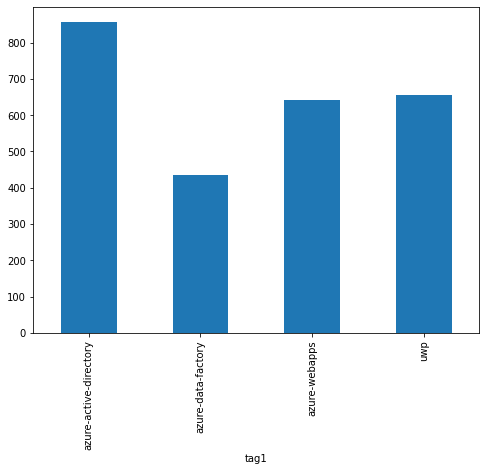

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
cleanedinputdf.groupby('tag1').content_withouttags.count().plot.bar(ylim=0)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(cleanedinputdf['title'], cleanedinputdf['tag1'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf
clf = MultinomialNB().fit(X_train_tfidf, y_train)
X_test_counts = count_vect.transform(X_test)
y_pred=clf.predict(X_test_counts)
accuracy_score(y_test, y_pred)
#from sklearn import metrics
#print(metrics.classification_report(y_test, y_pred, target_names=cleanedinputdf['tag1'].unique()))


0.8531684698608965

In [14]:
print(clf.predict(count_vect.transform(["What happens if copy activity bind to the same storage queue for input "])))

['azure-data-factory']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

NameError: ignored

In [15]:
cv_df.groupby('model_name').accuracy.mean()

NameError: ignored

In [16]:
pip install --upgrade requests

     |████████████████████████████████| 71kB 2.0MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [17]:
import requests
# pprint is used to format the JSON response
from pprint import pprint

In [18]:
import os

subscription_key = "9a24a33157484fcda8f493587c187c55"
endpoint = "https://harithatextanalyticsapi.cognitiveservices.azure.com/"

In [20]:
sentiment_url = endpoint + "/text/analytics/v3.0/sentiment"

In [57]:
subdata = cleanedinputdf.loc[:, ['id', 'title']].rename(columns={'id': 'id', 'title': 'text'})
subdata.insert(1, 'language', 'en')
subdata = subdata.loc[:9, :]
subdata = subdata.to_dict('records')
documents = { 'documents': subdata }
documents

{'documents': [{'id': 'MicrosoftQnA_21855',
   'language': 'en',
   'text': 'S/Mime AzuerAD/ Office 365'},
  {'id': 'MicrosoftQnA_21869',
   'language': 'en',
   'text': 'Azure AD SAML IDP provider with relay state'},
  {'id': 'MicrosoftQnA_2189',
   'language': 'en',
   'text': 'Script is disabled. Click Submit to continue.'},
  {'id': 'MicrosoftQnA_2190',
   'language': 'en',
   'text': 'Azure B2C securing metadata endpoint.'},
  {'id': 'MicrosoftQnA_21936',
   'language': 'en',
   'text': 'AAD Users for Accounts that Have Pre-Existing Microsoft Accounts'},
  {'id': 'MicrosoftQnA_21945',
   'language': 'en',
   'text': 'Office 365 Guest Users to normal users'},
  {'id': 'MicrosoftQnA_21989',
   'language': 'en',
   'text': 'Get-AzureADPolicy is not working'},
  {'id': 'MicrosoftQnA_21994',
   'language': 'en',
   'text': 'Skype for business online sdk login problem (401 - unauthorized)'},
  {'id': 'MicrosoftQnA_22027',
   'language': 'en',
   'text': 'Getting error while creating new

In [56]:
import json
headers = {"Ocp-Apim-Subscription-Key": subscription_key}
response = requests.post(sentiment_url, headers=headers, json=documents)
sentiments = response.json()
#pprint(sentiments)
#sentiments["sentiment"]
#sentiment=json.loads(sentiments)
#sentiments["documents"][0]["sentiment"]
sentiments["documents"][1]["sentences"][0]["text"]


'Azure AD SAML IDP provider with relay state'

In [ ]:
entities_url = endpoint + "/text/analytics/v3.0/entities/recognition/general"

In [ ]:
headers = {"Ocp-Apim-Subscription-Key": subscription_key}
response = requests.post(entities_url, headers=headers, json=documents,opinionMining=true)
entities = response.json()
pprint(entities)

{'documents': [{'entities': [{'category': 'Quantity',
                              'confidenceScore': 0.8,
                              'length': 3,
                              'offset': 28,
                              'subcategory': 'Number',
                              'text': 'One'},
                             {'category': 'Quantity',
                              'confidenceScore': 0.8,
                              'length': 2,
                              'offset': 63,
                              'subcategory': 'Number',
                              'text': '4K'},
                             {'category': 'Skill',
                              'confidenceScore': 0.8,
                              'length': 2,
                              'offset': 63,
                              'text': '4K'}],
                'id': '1',
                'warnings': []},
               {'entities': [{'category': 'DateTime',
                              'confidenceScore': 0.8,
   

In [ ]:
from collections import defaultdict
subdata=cleanedinputdf[['id','title']]
subdata['document']="documents"
subdata['language']="en"
#records=subdata.to_records(index='False')
#result = list(records)
#result
#data=defaultdict(result)
data=subdata.set_index('document').T.to_dict('dict')
#data=flatten_dict(data)
data
#subdata


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  if __name__ == '__main__':


{'documents': {'id': 'MicrosoftQnA_9933',
  'language': 'en',
  'title': 'Use external display in direct mode in UWP'}}

In [17]:
cleanedinputdf

,id,title,tag1,content_withouttags,Tag1_ID
0,MicrosoftQnA_21855,S/Mime AzuerAD/ Office 365,azure-active-directory,"hello, i would like to implement s/mime in a p...",0
1,MicrosoftQnA_21869,Azure AD SAML IDP provider with relay state,azure-active-directory,we can federate a domain on aad and configure ...,0
2,MicrosoftQnA_2189,Script is disabled. Click Submit to continue.,azure-active-directory,i am working with a webtest to mimic azure ad ...,0
3,MicrosoftQnA_2190,Azure B2C securing metadata endpoint.,azure-active-directory,does azure b2c support custom policy metadata ...,0
4,MicrosoftQnA_21936,AAD Users for Accounts that Have Pre-Existing ...,azure-active-directory,"hello, i have an interesting problem to share...",0
...,...,...,...,...,...
2582,MicrosoftQnA_9842,Question about UWP and broadFileSystemAccess,uwp,i have a uwp app that needs full access to the...,3
2583,MicrosoftQnA_9856,x:Uid cache,uwp,"hi, is there some way to disable or reliably ...",3
2584,MicrosoftQnA_9903,is there a way to force loading a StorageFile ...,uwp,i have a storagefile that i want to use as inp...,3
2585,MicrosoftQnA_9913,How to set background color on TextBlock,uwp,how can the background color on a textblock co...,3


In [ ]:
headers = {"Ocp-Apim-Subscription-Key": subscription_key}
response = requests.post(sentiment_url, headers=headers, json=data)
pprint(sentiments)

{'error': {'code': 'InvalidRequest',
           'innererror': {'code': 'MissingInputRecords',
                          'message': 'Missing input records.'},
           'message': 'Invalid Request.'}}


In [4]:
# Stack Overflow code for Questions tagging 
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [20]:
from sklearn.utils import shuffle
cleanedinputdf = shuffle(cleanedinputdf)

In [21]:
# split data into train, test, and valid sets
msk = np.random.rand(len(cleanedinputdf)) < 0.7
train = cleanedinputdf[msk]
temp = cleanedinputdf[~msk]
msk = np.random.rand(len(temp)) < 0.66
valid = temp[msk]
test = temp[~msk]

In [22]:
train.head(10)

,id,title,tag1,content_withouttags,Tag1_ID
2490,MicrosoftQnA_4547,Debug a live UWP app,uwp,"hi, when the users install our windows 10 uwp ...",3
1749,MicrosoftQnA_57123,Azure free trial subscription not found in VS ...,azure-webapps,when trying to deploy a bootleg web app in vs ...,2
1726,MicrosoftQnA_51864,Azure custom domain transfer : private registr...,azure-webapps,"hi, i want to transfer a custom domain i curre...",2
1691,MicrosoftQnA_4366,Azure App Service Node.js deployment with Kudu...,azure-webapps,i just used azure app service with ci/cd to de...,2
167,MicrosoftQnA_25751,Lab Sandbox Not Allowing Access to Azure AD,azure-active-directory,i&amp;#39;ve been working in the learn sandbox...,0
1829,MicrosoftQnA_74124,Linux App Service stops responding,azure-webapps,i&#39;ve been working on a flask app (python 3...,2
441,MicrosoftQnA_3732,AAD Login uses logged in user by default,azure-active-directory,"hi, i have a few applications that use aad f...",0
1708,MicrosoftQnA_46900,Azure App service not able to find root folder...,azure-webapps,"hi, i am facing one weird issue.i have create...",2
1265,MicrosoftQnA_94193,Copying Data From Azure Data Factory,azure-data-factory,"hi team, i am copying data between 2 storage a...",1
941,MicrosoftQnA_34943,Why we delete deployment in continuous integra...,azure-data-factory,while deploying in other environment like stag...,1


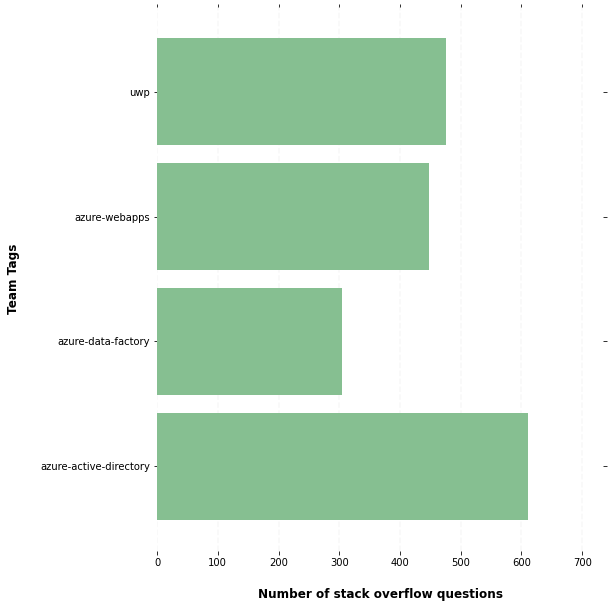

In [23]:
x = train.groupby('tag1')['title'].count()
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks, Draw vertical axis lines, Set axis labels
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlabel("Number of stack overflow questions", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Team Tags", labelpad=20, weight='bold', size=12)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


In [28]:
#Feature extraction, we’ll compute TF-IDF values.
random_state = 0 
vec = TfidfVectorizer(stop_words="english")
vec.fit(train.title.values)
features = vec.transform(train.title.values)

# Let’s create an instance of KMeans, issues that belong to one of 4 categories
cls = MiniBatchKMeans(n_clusters=4, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

Homogeneity:0.10877134736130226


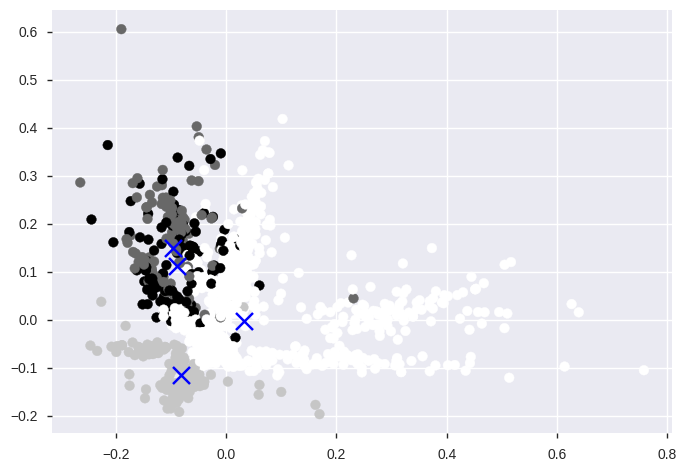

In [30]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

from sklearn.metrics import homogeneity_score
homogeneity = homogeneity_score(train.title, cls.predict(features))
print('Homogeneity:' + str(homogeneity))